In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
df=pd.read_csv('Height-Weight Data.csv')

In [3]:
df.shape

(3501, 2)

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [7]:
df.head(8)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111


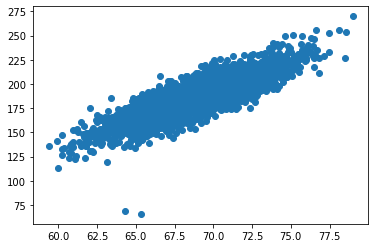

In [8]:
plt.scatter(df['Height'], df['Weight'])

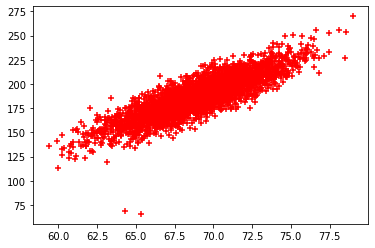

In [9]:
plt.scatter(df['Height'], df['Weight'], color='red', marker='+')

Text(0.5, 1.0, 'Height-Weight Data')

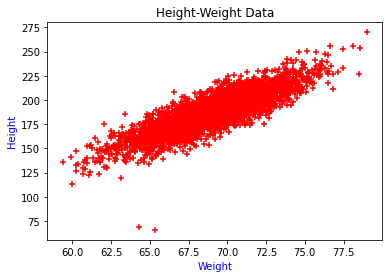

In [10]:
plt.scatter(df['Height'], df['Weight'], color='red', marker='+')
plt.xlabel('Weight', color='blue')
plt.ylabel('Height', color='blue')
plt.title('Height-Weight Data', color='Black')

In [11]:
df.Weight.mean()

186.89125797946284

In [12]:
df.Height.mean()

69.02441087268797

# Seperate dependent and independent variable

In [13]:
a=df[['Height']]

In [14]:
b=df[['Weight']]

In [15]:
a.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [16]:
b.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [17]:
a.shape

(3501, 1)

# Splite the dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
atrain,atest, btrain,btest=train_test_split(a,b,train_size=.70, random_state=1)

In [20]:
atrain.head()

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580


In [21]:
atest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [22]:
atrain.shape

(2450, 1)

In [23]:
atest.shape

(1051, 1)

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
rg=LinearRegression()

In [26]:
rg.fit(atrain,btrain)

LinearRegression()

In [27]:
atrain.head()

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580


In [28]:
rg.predict([[50.326]])

C:\Users\Mokabbir\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[74.9950916]])

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
rg.predict([[50]])

array([[73.04644308]])

In [31]:
atest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [32]:
btest.head()

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


In [33]:
bpred=rg.predict(atest)
bpred

array([[177.07092663],
       [189.9655512 ],
       [167.54939263],
       ...,
       [209.55755027],
       [178.6987462 ],
       [204.84854541]])

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mse=mean_squared_error(btest, bpred)

In [36]:
mse

110.89221516932378

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
mae=mean_absolute_error(btest, bpred)

In [39]:
mae

8.279688660993672

In [40]:
m=rg.coef_

In [41]:
m

array([[5.97744946]])

In [42]:
c=rg.intercept_

In [43]:
c

array([-225.82603001])

In [44]:
result=m*50.326+c
result

array([[74.9950916]])

In [45]:
rg.predict([[50.326]])

array([[74.9950916]])

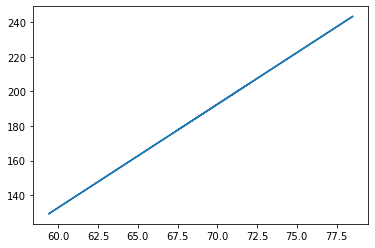

In [46]:
plt.plot(np.squeeze(atest), bpred)

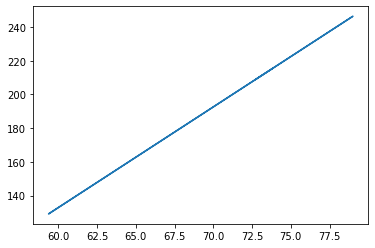

In [47]:
plt.plot(df.Height, rg.predict(df[['Height']]))

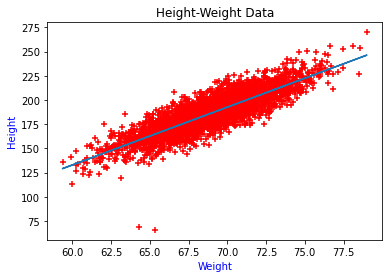

In [48]:
plt.scatter(df['Height'], df['Weight'], color='red', marker='+')
plt.xlabel('Weight', color='blue')
plt.ylabel('Height', color='blue')
plt.title('Height-Weight Data', color='Black')
plt.plot(df.Height, rg.predict(df[['Height']]))